# 주가 데이터 분석
- 어제 종가 데이터로 오늘의 종가를 예측

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer

In [2]:
# 시작 날짜와 종료날짜 입력
start_date = '2022-03-17'
end_date = '2023-08-01'

In [3]:
# 대한민국의 삼성전자 종목 번호
stock_number = '005930'

In [4]:
# 야후 파이낸스를 사용하여 주가 정보 가져오기
data = yf.download(stock_number+'.KS', start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [5]:
# 어제의 종가를 'Close_yesterday' 열로 추가
data['Close_yesterday'] = data['Close'].shift(1)

In [6]:
# 오늘의 종가를 'Close_today' 열로 추가
data['Close_today'] = data['Close']

In [7]:
# 데이터 확인
data # Close_yesterday 첫 행에 결측치 존재

,Open,High,Low,Close,Adj Close,Volume,Close_yesterday,Close_today
Date,,,,,,,,
2022-03-17,70400.0,70400.0,70400.0,70400.0,67972.890625,0,NaN,70400.0
2022-03-18,70600.0,70900.0,70200.0,70700.0,68262.546875,14410038,70400.0,70700.0
2022-03-21,70900.0,71000.0,69900.0,69900.0,67490.125000,11169002,70700.0,69900.0
2022-03-22,69900.0,70500.0,69900.0,70300.0,67876.335938,9402666,69900.0,70300.0
2022-03-23,70600.0,71200.0,70300.0,70500.0,68069.453125,12398025,70300.0,70500.0
...,...,...,...,...,...,...,...,...
2023-07-25,70000.0,70500.0,69800.0,70000.0,70000.000000,14314945,70400.0,70000.0
2023-07-26,69800.0,70600.0,68100.0,69800.0,69800.000000,30016221,70000.0,69800.0
2023-07-27,69900.0,71700.0,69300.0,71700.0,71700.000000,24261179,69800.0,71700.0


In [8]:
# 어제 종가 입력
input_price = float('69800.0')

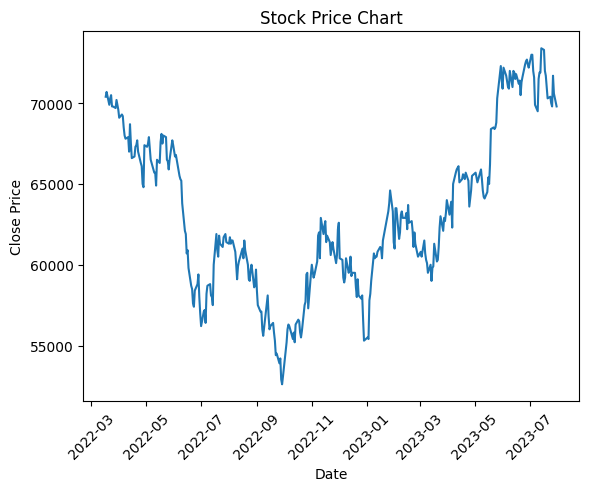

In [9]:
# 주가 데이터 시각화
plt.plot(data.index, data['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Price Chart')
plt.xticks(rotation=45)
plt.show()

In [10]:
# 결측치 대체
imputer = SimpleImputer(strategy='mean')
X = data[['Close_yesterday']]
y = data['Close_today']
X_imputed = imputer.fit_transform(X)

In [11]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

## 1. 선형 회귀모형 사용

In [12]:
# 선형 회귀모형으로 미래의 주가 예측
# 실제 8/1 주가 : 71100원
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
prediction_linear = linear_model.predict([[input_price]])

In [13]:
# 선형 회귀모형의 정확도 계산
y_train_pred_linear = linear_model.predict(X_train)
y_test_pred_linear = linear_model.predict(X_test)
train_accuracy_linear = r2_score(y_train, y_train_pred_linear)
test_accuracy_linear = r2_score(y_test, y_test_pred_linear)

In [14]:
print("선형 회귀모형 예측 결과:", prediction_linear)
print("선형 회귀모형의 훈련 세트 정확도:", train_accuracy_linear)
print("선형 회귀모형의 테스트 세트 정확도:", test_accuracy_linear)

선형 회귀모형 예측 결과: [69754.40822115]
선형 회귀모형의 훈련 세트 정확도: 0.9606946771830693
선형 회귀모형의 테스트 세트 정확도: 0.9661572103403926


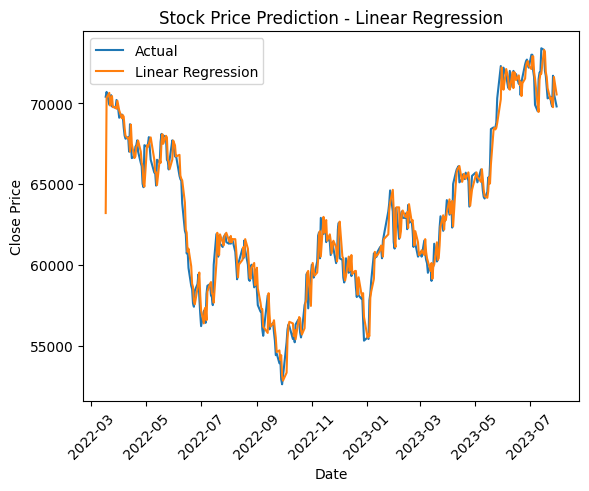

In [15]:
# 선형 회귀모형의 예측치 시각화
plt.plot(data.index, data['Close'], label='Actual')
plt.plot(data.index, linear_model.predict(X_imputed), label='Linear Regression')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Price Prediction - Linear Regression')
plt.legend()
plt.xticks(rotation=45)
plt.show()

## 2. 비선형 회귀모형 사용

In [16]:
# 비선형 회귀모형으로 미래의 주가 예측
# 실제 8/1 주가 : 71100원
nonlinear_model = SVR(kernel='rbf')
nonlinear_model.fit(X_train, y_train)
prediction_nonlinear = nonlinear_model.predict([[input_price]])

In [17]:
# 비선형 회귀모형의 정확도 계산
y_train_pred_nonlinear = nonlinear_model.predict(X_train)
y_test_pred_nonlinear = nonlinear_model.predict(X_test)
train_accuracy_nonlinear = r2_score(y_train, y_train_pred_nonlinear)
test_accuracy_nonlinear = r2_score(y_test, y_test_pred_nonlinear)

In [18]:
print("비선형 회귀모형 예측 결과:", prediction_nonlinear)
print("비선형 회귀모형의 훈련 세트 정확도:", train_accuracy_nonlinear)
print("비선형 회귀모형의 테스트 세트 정확도:", test_accuracy_nonlinear)

비선형 회귀모형 예측 결과: [62316.49587386]
비선형 회귀모형의 훈련 세트 정확도: -0.025380187616973027
비선형 회귀모형의 테스트 세트 정확도: 0.017320064491161746


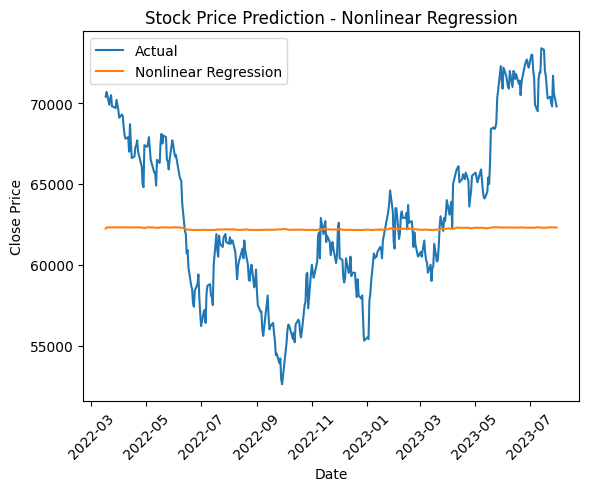

In [19]:
# 비선형 회귀모형의 예측치 시각화
plt.plot(data.index, data['Close'], label='Actual')
plt.plot(data.index, nonlinear_model.predict(X_imputed), label='Nonlinear Regression')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Price Prediction - Nonlinear Regression')
plt.legend()
plt.xticks(rotation=45)
plt.show()

## 3. 근접 회귀모형 사용

In [20]:
# 근접 회귀모형으로 미래의 주가 예측
# 실제 8/1 주가 : 71100원
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
prediction_knn = knn_model.predict([[input_price]])

In [21]:
# 근접 회귀모형의 정확도 계산
y_train_pred_knn = knn_model.predict(X_train)
y_test_pred_knn = knn_model.predict(X_test)
train_accuracy_knn = r2_score(y_train, y_train_pred_knn)
test_accuracy_knn = r2_score(y_test, y_test_pred_knn)

In [22]:
print("근접 회귀모형 예측 결과:", prediction_knn)
print("근접 회귀모형의 훈련 세트 정확도:", train_accuracy_knn)
print("근접 회귀모형의 테스트 세트 정확도:", test_accuracy_knn)

근접 회귀모형 예측 결과: [69760.]
근접 회귀모형의 훈련 세트 정확도: 0.9686290353503288
근접 회귀모형의 테스트 세트 정확도: 0.9627700235269627


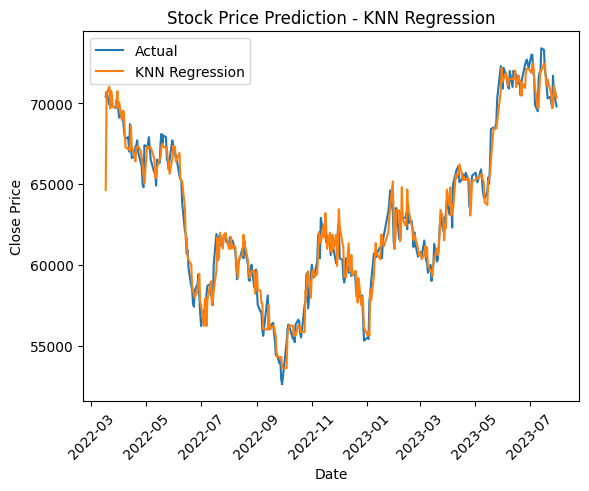

In [23]:
# 근접 회귀모형의 예측치 시각화
plt.plot(data.index, data['Close'], label='Actual')
plt.plot(data.index, knn_model.predict(X_imputed), label='KNN Regression')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Price Prediction - KNN Regression')
plt.legend()
plt.xticks(rotation=45)
plt.show()

## 삼성전자 vs 미국금리

In [26]:
# pip install finance-datareader
# pip install fredapi
import FinanceDataReader as fdr
from fredapi import Fred

In [27]:
# 1. 주가 불러오기
start_date = '2017-11-09'
end_date = '2023-07-28'
stock_code = '005930'
samsung_data = fdr.DataReader(stock_code, start_date, end_date)

In [28]:
# 2. 기간의 구분
phase1_start = '2017-11-09'
phase1_end = '2019-07-31'
phase2_start = '2019-07-31'
phase2_end = '2020-03-15'
phase3_start = '2020-03-15'
phase3_end = '2022-03-17'
phase4_start = '2022-03-17'
phase4_end = '2023-07-28'

In [29]:
# 3. 날짜 구간을 가져옴
phase1_data = samsung_data.loc[phase1_start:phase1_end]
phase2_data = samsung_data.loc[phase2_start:phase2_end]
phase3_data = samsung_data.loc[phase3_start:phase3_end]
phase4_data = samsung_data.loc[phase4_start:phase4_end]

In [30]:
# 4. 기준금리의 데이터를 가져옴
fred = Fred(api_key='your api key')
interest_rate_data = fred.get_series('DFF', start_date="2017-11-09", end_date="2023-07-28")

In [31]:
# 5. 주가를 3의 구간으로 나눔
phase1_data.index = pd.to_datetime(phase1_data.index)
phase2_data.index = pd.to_datetime(phase2_data.index)
phase3_data.index = pd.to_datetime(phase3_data.index)
phase4_data.index = pd.to_datetime(phase4_data.index)
interest_rate_data.index = pd.to_datetime(interest_rate_data.index)

In [32]:
# 6. 각 영역에 대한 색깔을 지정
colors = ['blue', 'orange', 'green', 'red']

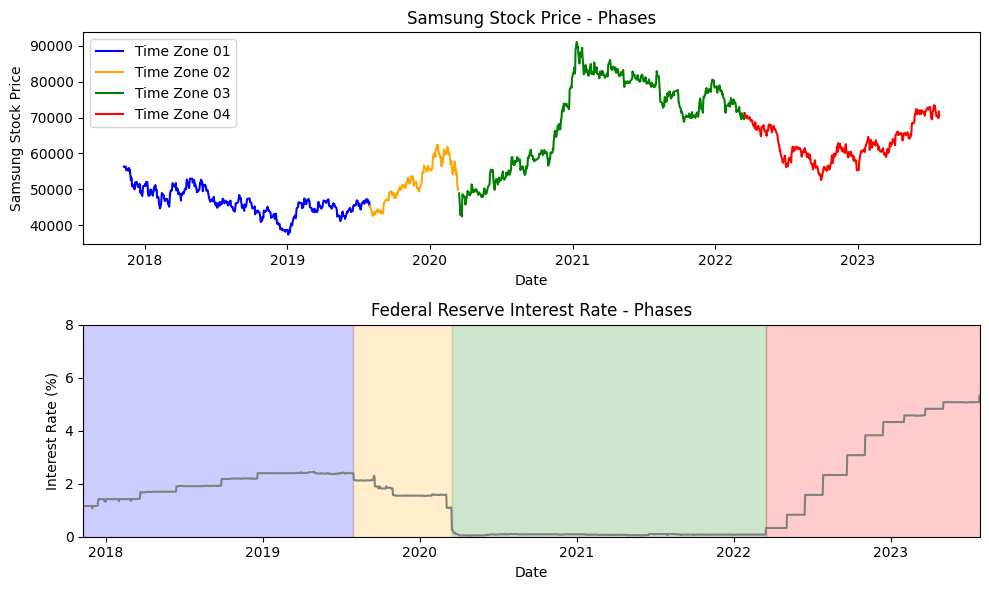

In [33]:
# 7. 불러온 데이터를 "차트"에 입력
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(phase1_data.index, phase1_data['Close'], label='Time Zone 01', color=colors[0])
plt.plot(phase2_data.index, phase2_data['Close'], label='Time Zone 02', color=colors[1])
plt.plot(phase3_data.index, phase3_data['Close'], label='Time Zone 03', color=colors[2])
plt.plot(phase4_data.index, phase4_data['Close'], label='Time Zone 04', color=colors[3])
plt.xlabel("Date")
plt.ylabel("Samsung Stock Price")
plt.title("Samsung Stock Price - Phases")
plt.legend()

# 8. 기준금리 데이터도 위와 같이 진행
plt.subplot(2, 1, 2)
plt.plot(interest_rate_data.index, interest_rate_data, color='gray')
plt.xlabel("Date")
plt.ylabel("Interest Rate (%)")
plt.title("Federal Reserve Interest Rate - Phases")
plt.xlim(pd.to_datetime("2017-11-09"), pd.to_datetime("2023-07-28"))
plt.ylim(0, 8)

# 각 단계에 배경색 지정
plt.axvspan(phase1_data.index[0], phase1_data.index[-1], color=colors[0], alpha=0.2)
plt.axvspan(phase2_data.index[0], phase2_data.index[-1], color=colors[1], alpha=0.2)
plt.axvspan(phase3_data.index[0], phase3_data.index[-1], color=colors[2], alpha=0.2)
plt.axvspan(phase4_data.index[0], phase4_data.index[-1], color=colors[3], alpha=0.2)

plt.tight_layout()
plt.show()

## 4. LSTM을 사용
- 밑에서 LSTM 모델로 예측을 할 때 데이터의 범위를 위 그래프의 빨간색 부분에 있는 데이터만 사용했다.

### 4-1. 데이터 array로 변환

In [34]:
data

,Open,High,Low,Close,Adj Close,Volume,Close_yesterday,Close_today
Date,,,,,,,,
2022-03-17,70400.0,70400.0,70400.0,70400.0,67972.890625,0,NaN,70400.0
2022-03-18,70600.0,70900.0,70200.0,70700.0,68262.546875,14410038,70400.0,70700.0
2022-03-21,70900.0,71000.0,69900.0,69900.0,67490.125000,11169002,70700.0,69900.0
2022-03-22,69900.0,70500.0,69900.0,70300.0,67876.335938,9402666,69900.0,70300.0
2022-03-23,70600.0,71200.0,70300.0,70500.0,68069.453125,12398025,70300.0,70500.0
...,...,...,...,...,...,...,...,...
2023-07-25,70000.0,70500.0,69800.0,70000.0,70000.000000,14314945,70400.0,70000.0
2023-07-26,69800.0,70600.0,68100.0,69800.0,69800.000000,30016221,70000.0,69800.0
2023-07-27,69900.0,71700.0,69300.0,71700.0,71700.000000,24261179,69800.0,71700.0


In [35]:
# data to array (LSTM에 넣어주기 위함)
samsung_dataset = pd.DataFrame(data['Close']).values

In [36]:
# Get the number of rows to train the model on
training_data_len = int(np.ceil(len(samsung_dataset) * .95))
training_data_len

324

### 4-2. 데이터 스케일링

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
scaler = MinMaxScaler(feature_range=(0,1))
samsung_scaled_data = scaler.fit_transform(samsung_dataset)
samsung_scaled_data

array([[0.85576923],
       [0.87019231],
       [0.83173077],
       [0.85096154],
       [0.86057692],
       [0.82692308],
       [0.82692308],
       [0.82211538],
       [0.84615385],
       [0.83173077],
       [0.81730769],
       [0.79326923],
       [0.80288462],
       [0.79807692],
       [0.76442308],
       [0.74038462],
       [0.73076923],
       [0.73557692],
       [0.69230769],
       [0.77403846],
       [0.71634615],
       [0.67307692],
       [0.67788462],
       [0.70673077],
       [0.71153846],
       [0.72596154],
       [0.69230769],
       [0.65865385],
       [0.64903846],
       [0.59615385],
       [0.58653846],
       [0.71153846],
       [0.70673077],
       [0.71634615],
       [0.73557692],
       [0.66826923],
       [0.62980769],
       [0.62980769],
       [0.59134615],
       [0.66826923],
       [0.65865385],
       [0.72115385],
       [0.74519231],
       [0.71634615],
       [0.74038462],
       [0.73557692],
       [0.66826923],
       [0.663

### 4-3. train, test 나누기

In [39]:
# Train Data 만들기
samsung_train_data = samsung_scaled_data[0:int(training_data_len), :]

samsung_x_train = []
samsung_y_train = []

# 여기서는 이전 60일 동안의 데이터로 현재 종가 예측을 목표
for i in range(60, len(samsung_train_data)):
    samsung_x_train.append(samsung_train_data[i-60:i, 0])
    samsung_y_train.append(samsung_train_data[i, 0])

# train data x, y -> array로 만들기
samsung_x_train, samsung_y_train = np.array(samsung_x_train), np.array(samsung_y_train)

# Reshape
amzn_x_train = np.reshape(samsung_x_train, (samsung_x_train.shape[0], samsung_x_train.shape[1], 1))

### 4-4. 모델 학습

LSTM 신경망 모델
- 기본값 128, 64, 25, 1 -> 32, 16, 16, 1 로 바꿔서 진행

In [40]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [43]:
model = Sequential()
model.add(LSTM(32, return_sequences=True, input_shape= (samsung_x_train.shape[1], 1)))
model.add(LSTM(16, return_sequences=False))
model.add(Dense(16))
model.add(Dense(1))

In [44]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [48]:
model.fit(samsung_x_train, samsung_y_train, batch_size=32, epochs=30)

Epoch 1/30
9/9 [==============================] - 0s 15ms/step - loss: 0.0036
Epoch 2/30
9/9 [==============================] - 0s 14ms/step - loss: 0.0033
Epoch 3/30
9/9 [==============================] - 0s 16ms/step - loss: 0.0033
Epoch 4/30
9/9 [==============================] - 0s 14ms/step - loss: 0.0031
Epoch 5/30
9/9 [==============================] - 0s 17ms/step - loss: 0.0031
Epoch 6/30
9/9 [==============================] - 0s 15ms/step - loss: 0.0031
Epoch 7/30
9/9 [==============================] - 0s 18ms/step - loss: 0.0031
Epoch 8/30
9/9 [==============================] - 0s 14ms/step - loss: 0.0031
Epoch 9/30
9/9 [==============================] - 0s 15ms/step - loss: 0.0031
Epoch 10/30
9/9 [==============================] - 0s 14ms/step - loss: 0.0031
Epoch 11/30
9/9 [==============================] - 0s 16ms/step - loss: 0.0031
Epoch 12/30
9/9 [==============================] - 0s 20ms/step - loss: 0.0031
Epoch 13/30
9/9 [==============================] - 0s 19ms/st

### 4-5. 모델 테스트

In [49]:
# Test Data
samsung_test_data = samsung_scaled_data[training_data_len - 60: , :]

samsung_x_test = []
samsung_y_test = samsung_dataset[training_data_len:, :]
for i in range(60, len(samsung_test_data)):
    samsung_x_test.append(samsung_test_data[i-60:i, 0])

# Convert the data to a numpy array
samsung_x_test = np.array(samsung_x_test)

# Reshape the data
samsung_x_test = np.reshape(samsung_x_test, (samsung_x_test.shape[0], samsung_x_test.shape[1], 1 ))

In [51]:
# Get the models predicted price values
samsung_pred = model.predict(samsung_x_test)

# 스케일링한 값 되돌리기
samsung_pred = scaler.inverse_transform(samsung_pred)

# Get the root mean squared error (RMSE)
samsung_rmse = np.sqrt(np.mean(((samsung_pred - samsung_y_test) ** 2)))
samsung_rmse

1/1 [==============================] - 2s 2s/step


1595.079413138338

In [53]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['samsung_pred'] = samsung_pred

<ipython-input-53-34f469a9d0ad>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['samsung_pred'] = samsung_pred


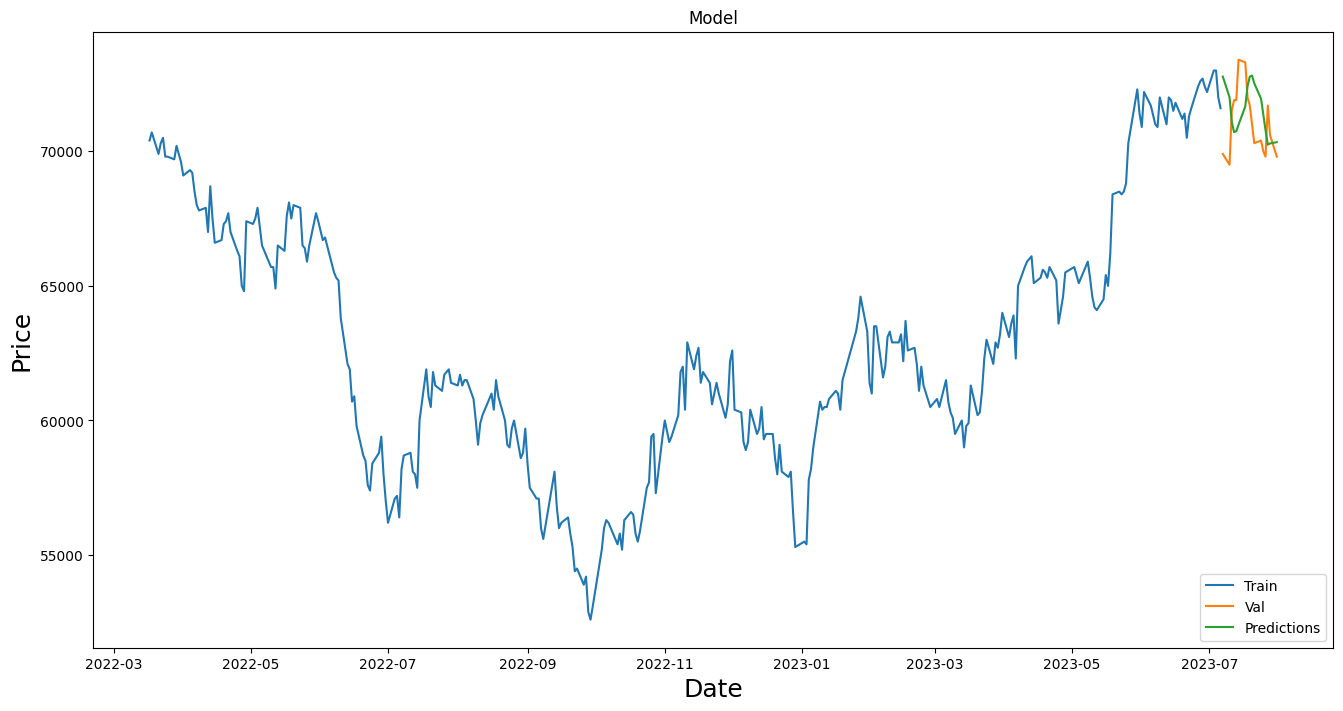

In [55]:
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'samsung_pred']])
plt.legend(['Train', 'Valid', 'Predictions'], loc='lower right')
plt.show()
# train과 val이 분리된 지점을 살펴보면 train의 마지막은 71600.0원(2023-07-06)이고 val의 첫번째는 69900.0원(2023-07-07)여서 그래프를 보면 약간의 공백이 존재한다.
# 모델이 정확하지 않은 이유를 예측해 보면, 데이터의 개수가 생각보다 많지 않았고 모델을 복잡하게 설계하지 않고 간단하게 설계해서인 것 같다.